In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:

# Load the dataset
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(50)
df

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
5,2010-01-03 18:25:00,1098.95,1099.20,1098.60,1098.90,67.50,1097.68
6,2010-01-03 18:30:00,1098.85,1098.90,1098.40,1098.65,64.11,1097.85
7,2010-01-03 18:35:00,1098.55,1098.55,1096.90,1097.30,49.63,1097.91
8,2010-01-03 18:40:00,1097.20,1097.85,1097.10,1097.70,53.01,1098.01
9,2010-01-03 18:45:00,1097.65,1097.90,1097.20,1097.75,53.44,1098.11


In [ ]:
plt.figure(
    figsize=(
        20,  #panjang
        10  # lebar
    ))
sns.barplot(
    x=df['time'],
    y=df['open'],
    label='open', color='grey',
    # linewidth=6
)

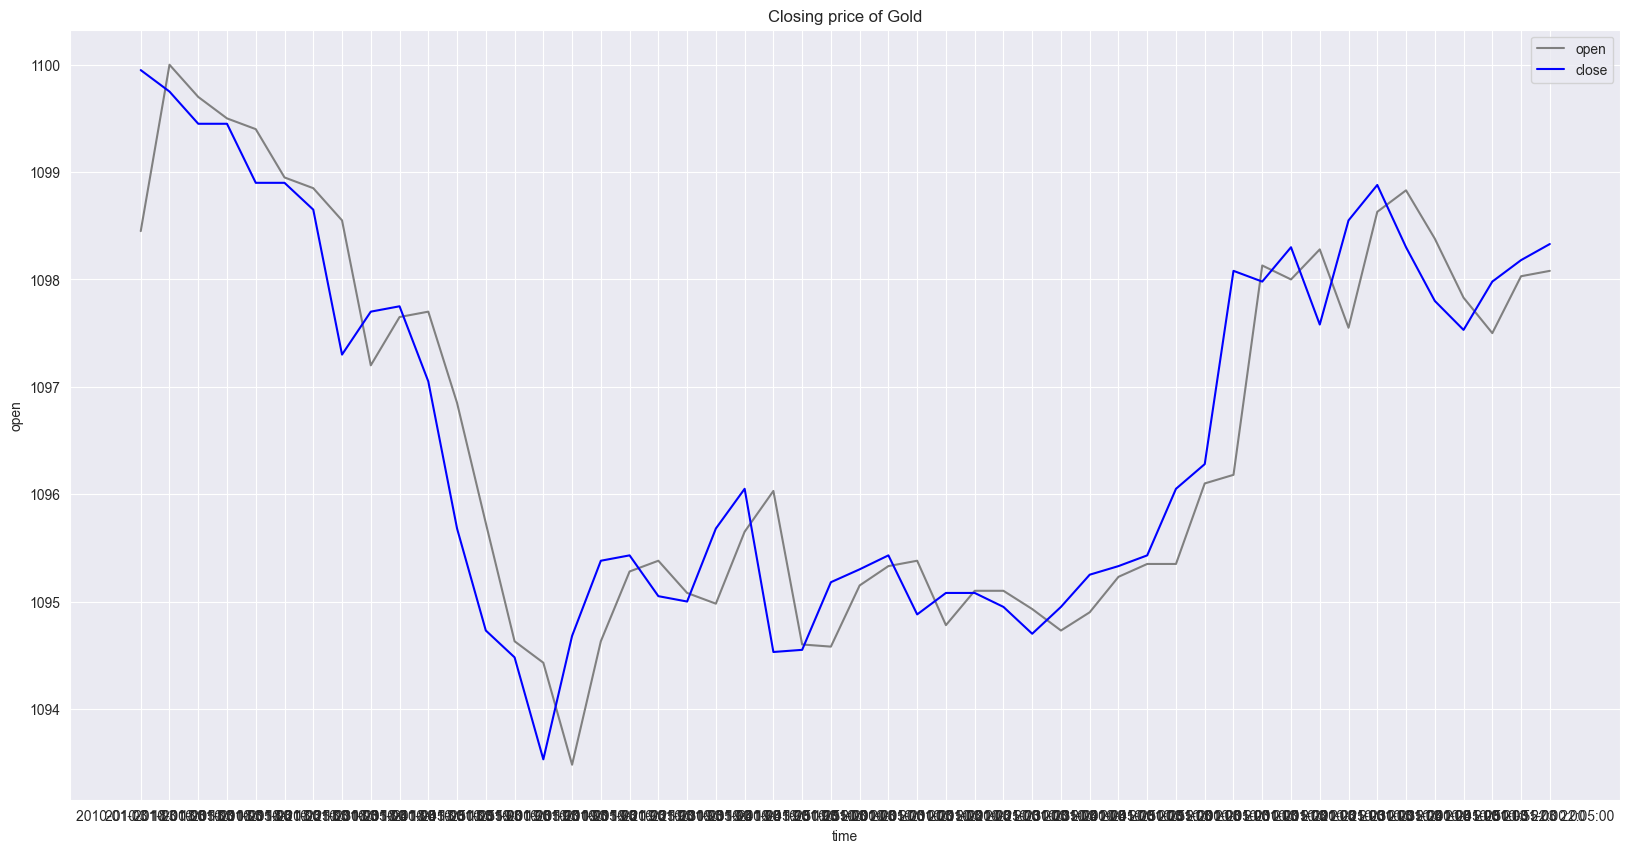

In [46]:
sns.lineplot(
    x=df['time'],
    y=df['close'],
    label='close', color='blue')
# sns.lineplot(df['high'], label='high' ,color='red')
# sns.lineplot(df['low'],label='low' ,color='green')
plt.title('Closing price of Gold')
plt.show()


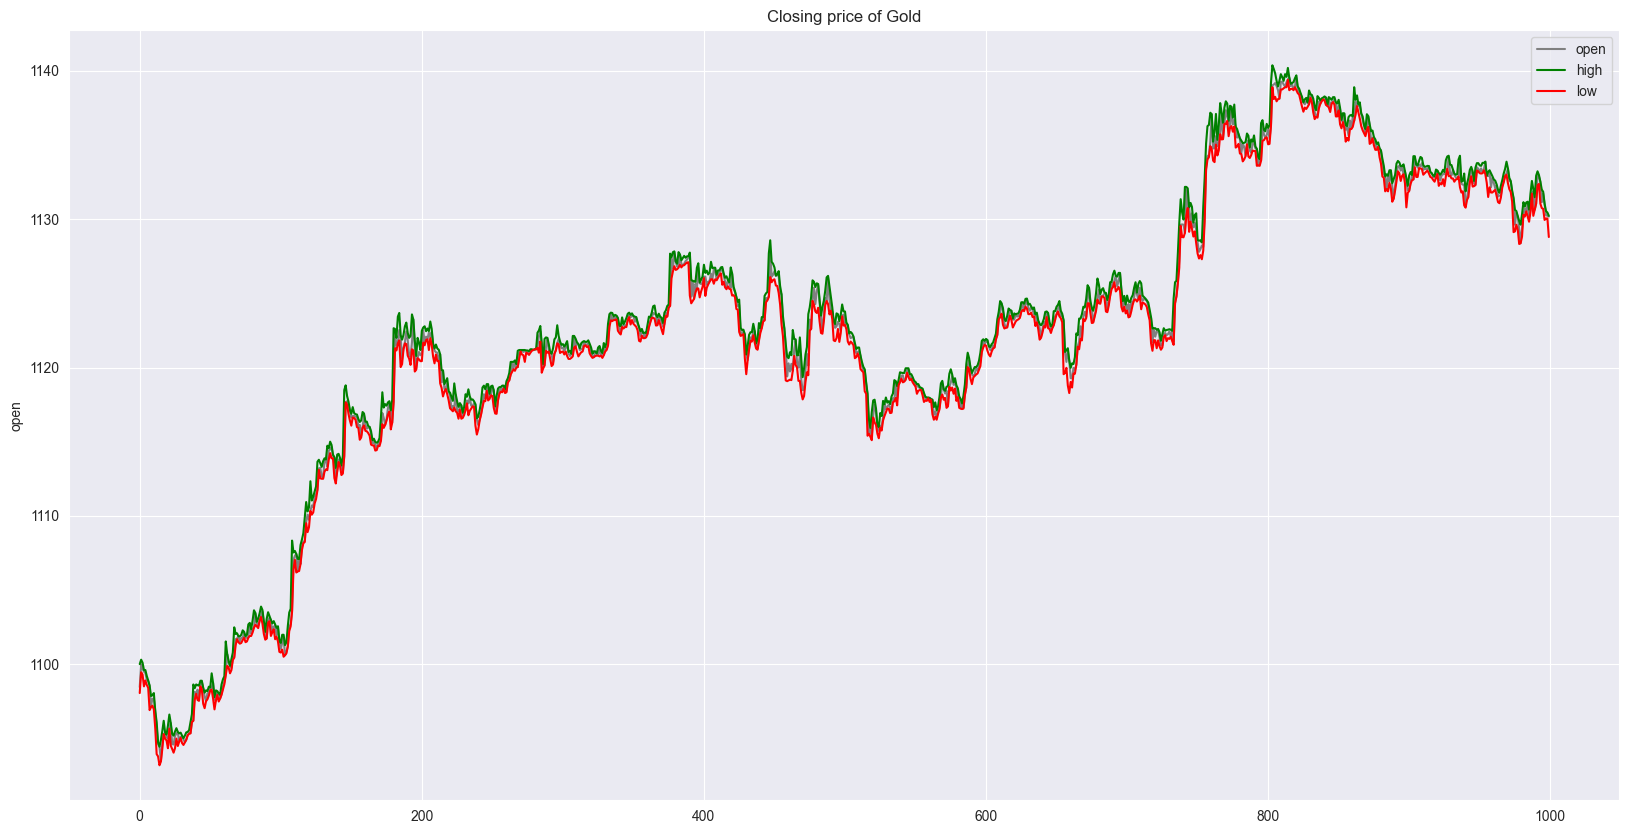

In [35]:
plt.figure(
    figsize=(
        20,  #panjang
        10  # lebar
    ))
sns.lineplot(df['open'], label='open', color='grey',
             # linewidth=6
             )
sns.lineplot(df['high'], label='high', color='green')
sns.lineplot(df['low'], label='low', color='red')
plt.title('Closing price of Gold')
plt.show()


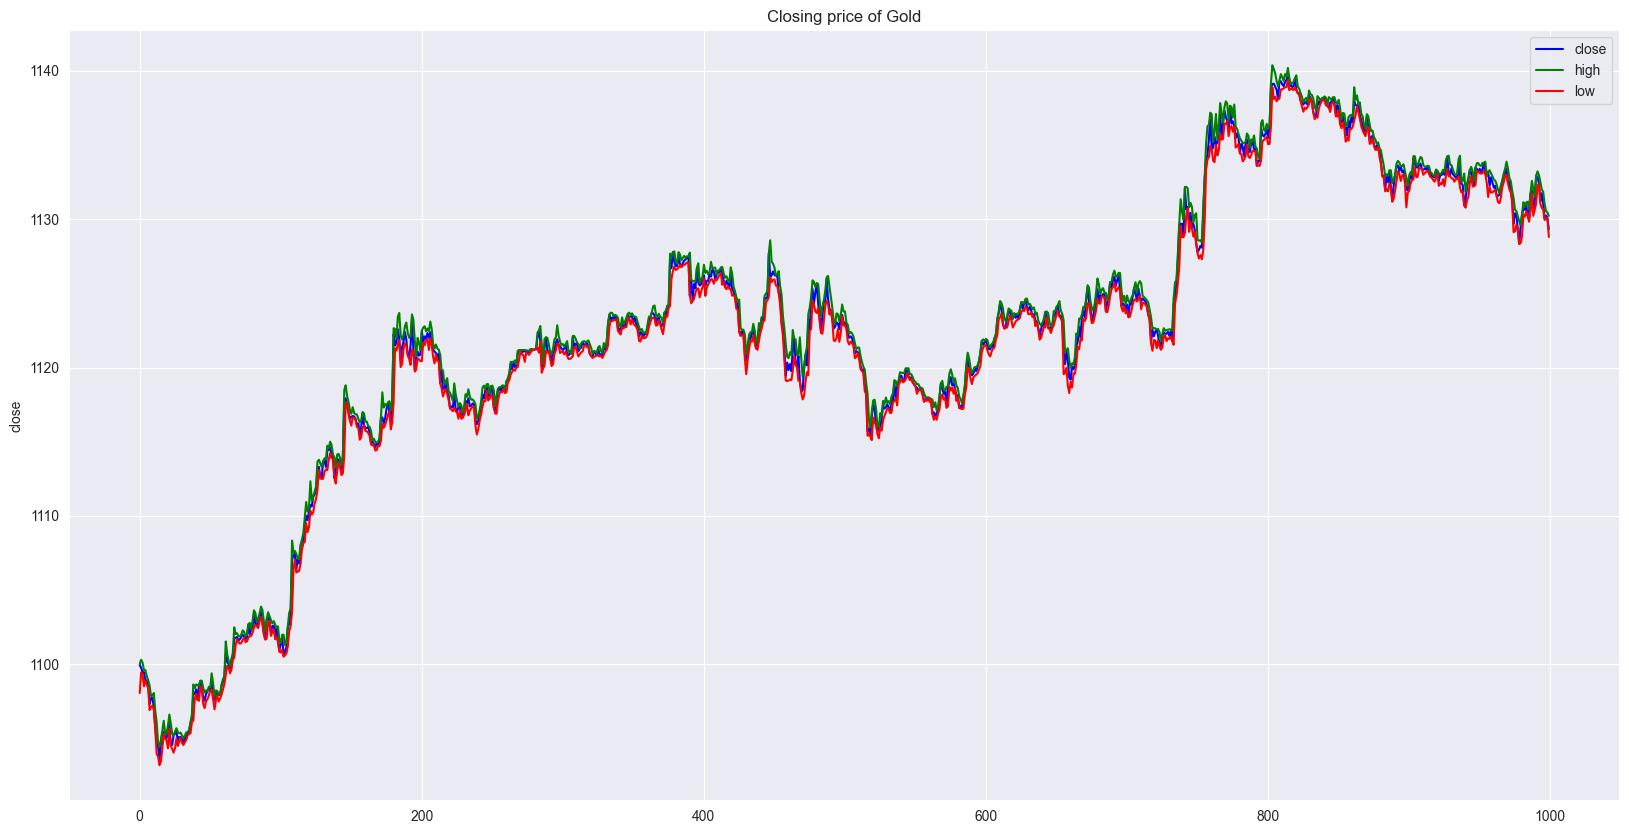

In [36]:
plt.figure(
    figsize=(
        20,  #panjang
        10  # lebar
    ))
sns.lineplot(df['close'], label='close', color='blue')
sns.lineplot(df['high'], label='high', color='green')
sns.lineplot(df['low'], label='low', color='red')
plt.title('Closing price of Gold')
plt.show()


In [39]:


# Select relevant features for classification
features = ['open', 'high', 'low', 'close']
X = df[features]

In [40]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-2.25318601, -2.15166225, -2.25572817, -2.11812519],
       [-2.1050892 , -2.12299464, -2.12158736, -2.13728281],
       [-2.1337531 , -2.14210638, -2.13595959, -2.16601923],
       ...,
       [ 0.78805372,  0.76765664,  0.81034751,  0.78425333],
       [ 0.7832764 ,  0.75810077,  0.81034751,  0.76988512],
       [ 0.77849909,  0.73707785,  0.69057893,  0.6961283 ]])

## Data Splitting

In [20]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:

# Initialize and train the Logistic Regression classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Confusion Matrix:
[[  86    0    0    0    0    0]
 [   0   35    0    0    0    0]
 [   0    0 1786    0    0    0]
 [   0    0    0 8210    0    0]
 [   0    0    0    0 2007    0]
 [   0    0    0    0    0 7876]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00      1786
         4.0       1.00      1.00      1.00      8210
         5.0       1.00      1.00      1.00      2007
         7.0       1.00      1.00      1.00      7876

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Accuracy Score:
1.0


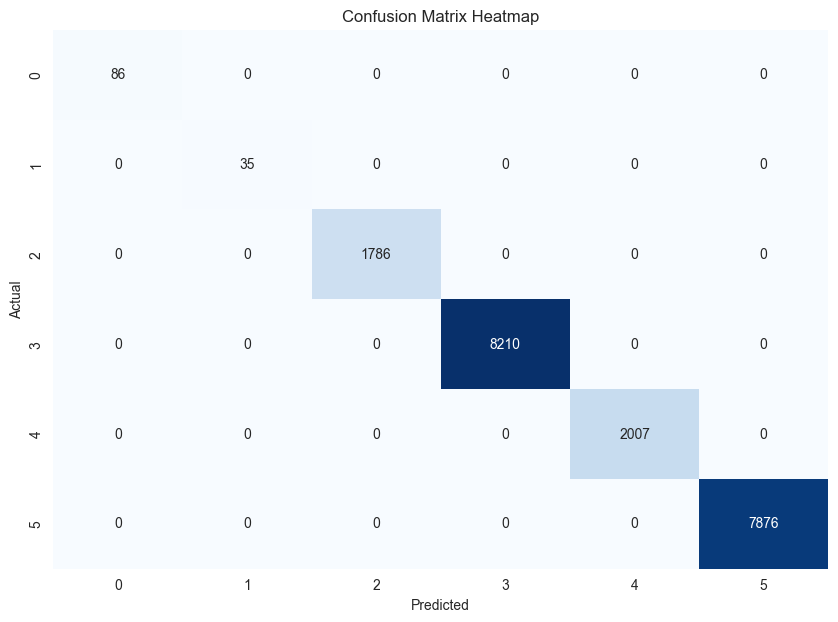

In [23]:

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize the classifier's performance
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [24]:

# ROC Curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: multiclass format is not supported

In [ ]:
from sklearn.svm import SVC

classifier = SVC(probability=True, random_state=42)
classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize the classifier's performance
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ROC Curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()